# Statistical Factor Models

This notebook demonstrates Principal Component Analysis (PCA) for portfolio analysis using stock data.

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from helpers import get_yahoo_data
from datetime import datetime, timedelta

# Set display options
pd.options.display.float_format = '{:.6f}'.format
np.set_printoptions(suppress=True)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Data Preparation

In [2]:
to_date = datetime.now()  # today
from_date = to_date - timedelta(days=3*365)  # past five years
begin_date = from_date.strftime('%Y-%m-%d')
end_date = to_date.strftime('%Y-%m-%d')
interval = '1d'  # daily frequency

# Get S&P 500 index data
sp500_index = get_yahoo_data(["^GSPC"], from_date, to_date, interval="1d")

# Define tickers
tickers = ["AAPL", "AMZN", "NFLX", "GOOG", "META", "XOM", "GM", "T", "WMT", "SBUX"]

# Ticker descriptions:
# Meta (META)
# Google (GOOG)
# Apple Inc (AAPL)
# Amazon (AMZN)
# Netflix (NFLX)
# Exxon Mobil (XOM)
# General Motors Company (GM)
# AT&T (T)
# Walmart Inc. (WMT)
# Starbucks (SBUX)

# Get stock prices
prices = get_yahoo_data(tickers, from_date, to_date, interval="1d")
sp500_index=sp500_index.xs('Adj Close', level=1, axis=1)
prices = prices.xs('Adj Close', level=1, axis=1)

print(f"Data shape: {prices.shape}")
print(f"\nDate range: {prices.index[0]} to {prices.index[-1]}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed

Data shape: (752, 10)

Date range: 2022-10-18 00:00:00 to 2025-10-16 00:00:00


In [3]:
# Compute daily log-returns
X = np.log(prices / prices.shift(1)).dropna()  # log-returns stocks
f = np.log(sp500_index / sp500_index.shift(1)).dropna()  # log-returns S&P500 index

# Get dimensions
N = X.shape[1]  # number of stocks
T = X.shape[0]  # number of days

# Compute covariance matrix
Sigma = X.cov()

print(f"Number of stocks (N): {N}")
print(f"Number of trading days (T): {T}")
print(f"\nLog-returns summary:")
print(X.describe())

Number of stocks (N): 10
Number of trading days (T): 751

Log-returns summary:
Ticker       AMZN       NFLX          T       AAPL         GM       META  \
count  751.000000 751.000000 751.000000 751.000000 751.000000 751.000000   
mean     0.000814   0.002120   0.000915   0.000744   0.000728   0.002244   
std      0.020939   0.022310   0.015046   0.017203   0.021227   0.026445   
min     -0.094081  -0.095336  -0.109883  -0.097013  -0.094165  -0.281794   
25%     -0.010457  -0.009483  -0.006960  -0.007451  -0.010385  -0.009868   
50%      0.000423   0.001326   0.001483   0.001186   0.001748   0.001639   
75%      0.012975   0.013097   0.008901   0.008963   0.011312   0.013561   
max      0.114915   0.148892   0.081357   0.142617   0.093581   0.209308   

Ticker       SBUX       GOOG        XOM        WMT  
count  751.000000 751.000000 751.000000 751.000000  
mean     0.000024   0.001221   0.000260   0.001206  
std      0.020028   0.019702   0.014652   0.012503  
min     -0.172896  -0.10

## Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms the data into a new coordinate system where the greatest variances lie on the first coordinates (principal components).

In [4]:
# Standardize the data (center and scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# The center and scale components correspond to the means and standard deviations
print("Means of variables:")
print(pd.Series(scaler.mean_, index=X.columns))
print("\nStandard deviations of variables:")
print(pd.Series(scaler.scale_, index=X.columns))

# Verify standardization
print("\nMeans after standardization (should be ~0):")
print(X.mean())
print("\nStandard deviations after standardization (should be ~1):")
print(X.std())

Means of variables:
Ticker
AMZN   0.000814
NFLX   0.002120
T      0.000915
AAPL   0.000744
GM     0.000728
META   0.002244
SBUX   0.000024
GOOG   0.001221
XOM    0.000260
WMT    0.001206
dtype: float64

Standard deviations of variables:
Ticker
AMZN   0.020925
NFLX   0.022295
T      0.015036
AAPL   0.017191
GM     0.021213
META   0.026427
SBUX   0.020014
GOOG   0.019689
XOM    0.014643
WMT    0.012495
dtype: float64

Means after standardization (should be ~0):
Ticker
AMZN   0.000814
NFLX   0.002120
T      0.000915
AAPL   0.000744
GM     0.000728
META   0.002244
SBUX   0.000024
GOOG   0.001221
XOM    0.000260
WMT    0.001206
dtype: float64

Standard deviations after standardization (should be ~1):
Ticker
AMZN   0.020939
NFLX   0.022310
T      0.015046
AAPL   0.017203
GM     0.021227
META   0.026445
SBUX   0.020028
GOOG   0.019702
XOM    0.014652
WMT    0.012503
dtype: float64


In [5]:
# Covariance matrix of the scaled returns
cov_scaled = np.cov(X_scaled.T)
print("Covariance matrix of scaled returns:")
print(pd.DataFrame(cov_scaled, index=X.columns, columns=X.columns).round(4))

Covariance matrix of scaled returns:
Ticker     AMZN     NFLX         T     AAPL       GM     META     SBUX  \
Ticker                                                                   
AMZN   1.001300 0.424400  0.010900 0.495600 0.278300 0.601800 0.270400   
NFLX   0.424400 1.001300  0.102200 0.383400 0.184500 0.362600 0.190400   
T      0.010900 0.102200  1.001300 0.096700 0.162100 0.005600 0.109400   
AAPL   0.495600 0.383400  0.096700 1.001300 0.278400 0.440700 0.360500   
GM     0.278300 0.184500  0.162100 0.278400 1.001300 0.224200 0.217100   
META   0.601800 0.362600  0.005600 0.440700 0.224200 1.001300 0.222300   
SBUX   0.270400 0.190400  0.109400 0.360500 0.217100 0.222300 1.001300   
GOOG   0.601400 0.336700 -0.024600 0.515300 0.204900 0.513000 0.204900   
XOM    0.094000 0.114400  0.178600 0.233700 0.322700 0.052200 0.224600   
WMT    0.271900 0.211400  0.175600 0.302600 0.177400 0.190900 0.208900   

Ticker      GOOG      XOM      WMT  
Ticker                              


In [6]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Extract eigenvalues (variances of principal components)
pca_var = pca.explained_variance_
print("Eigenvalues (variances of principal components):")
print(pca_var)

Eigenvalues (variances of principal components):
[3.42119368 1.41298541 0.93879631 0.83165283 0.75000449 0.69949543
 0.64374025 0.52584171 0.44011516 0.34950805]


### Principal Component Loadings (Eigenvectors)

The loadings show how each original variable contributes to each principal component.

In [7]:
# Principal Component Loadings (eigenvectors)
# Note: sklearn uses positive direction by default, unlike R's prcomp
phi = pca.components_.T

print("Principal Component Loadings (first 3 components):")
loadings_df = pd.DataFrame(phi[:, :3], index=X.columns, columns=['PC1', 'PC2', 'PC3'])
print(loadings_df)

Principal Component Loadings (first 3 components):
            PC1       PC2       PC3
Ticker                             
AMZN   0.429330 -0.235636 -0.000593
NFLX   0.327060 -0.071823  0.212520
T      0.089202  0.513849  0.529057
AAPL   0.413586  0.006821 -0.028723
GM     0.261303  0.352470 -0.355071
META   0.385699 -0.277145 -0.016618
SBUX   0.268183  0.240009 -0.142796
GOOG   0.389251 -0.295516 -0.076623
XOM    0.170152  0.536062 -0.448178
WMT    0.245487  0.204667  0.566243


### Principal Component Scores

Each principal component vector defines a direction in feature space. Because eigenvectors are orthogonal to every other eigenvector, loadings and therefore principal components are uncorrelated with one another, and form a basis of the new space.

If we project the n data points onto eigenvectors, the projected values are called the principal component scores for each observation.

In [9]:
# Transform data to get Principal Component Scores
PCS = pca.transform(X_scaled)

print("Principal Component Scores (first 6 rows, first 3 components):")
pcs_df = pd.DataFrame(PCS, index=X.index, columns=[f'PC{i+1}' for i in range(N)])
print(pcs_df.iloc[:6, :3])
print(f"\nShape of PCS: {PCS.shape}")

Principal Component Scores (first 6 rows, first 3 components):
                 PC1       PC2      PC3
Date                                   
2022-10-19  1.078610  0.236844 0.395778
2022-10-20 -0.256596  2.551882 2.618240
2022-10-21  3.906385  2.072624 0.758938
2022-10-24  0.255057  0.865821 1.141085
2022-10-25  2.833974 -0.097691 0.128376
2022-10-26 -3.141521  4.377622 1.061023

Shape of PCS: (751, 10)


In [10]:
# Alternative calculation: manually compute scores
PCS_manual = X_scaled @ phi

print("Manually calculated Principal Component Scores (first 6 rows, first 3 components):")
print(pd.DataFrame(PCS_manual[:6, :3], columns=['PC1', 'PC2', 'PC3']))

Manually calculated Principal Component Scores (first 6 rows, first 3 components):
        PC1       PC2      PC3
0  1.078610  0.236844 0.395778
1 -0.256596  2.551882 2.618240
2  3.906385  2.072624 0.758938
3  0.255057  0.865821 1.141085
4  2.833974 -0.097691 0.128376
5 -3.141521  4.377622 1.061023


### Verification: Covariance of Principal Components

The variances of the principal components should equal the eigenvalues, and the covariances should be 0 (aside from rounding errors) since principal components are uncorrelated.

In [11]:
# Check: covariance matrix of principal components
cov_pcs = np.cov(PCS.T)
print("Covariance matrix of Principal Components (should be diagonal):")
print(np.round(cov_pcs, 5))

print("\nDiagonal of covariance matrix (should equal eigenvalues):")
print(np.diag(cov_pcs))

print("\nEigenvalues:")
print(pca_var)

Covariance matrix of Principal Components (should be diagonal):
[[ 3.42119 -0.      -0.      -0.       0.       0.       0.      -0.
   0.      -0.     ]
 [-0.       1.41299  0.      -0.      -0.       0.      -0.      -0.
   0.       0.     ]
 [-0.       0.       0.9388  -0.      -0.       0.       0.       0.
   0.       0.     ]
 [-0.      -0.      -0.       0.83165  0.      -0.      -0.       0.
  -0.       0.     ]
 [ 0.      -0.      -0.       0.       0.75     0.       0.       0.
   0.      -0.     ]
 [ 0.       0.       0.      -0.       0.       0.6995   0.      -0.
  -0.      -0.     ]
 [ 0.      -0.       0.      -0.       0.       0.       0.64374  0.
   0.      -0.     ]
 [-0.      -0.       0.       0.       0.      -0.       0.       0.52584
  -0.       0.     ]
 [ 0.       0.       0.      -0.       0.      -0.       0.      -0.
   0.44012 -0.     ]
 [-0.       0.       0.       0.      -0.      -0.      -0.       0.
  -0.       0.34951]]

Diagonal of covariance matrix

### Reconstruction of Original Variables

The original variables can be expressed as linear combinations of the principal components.

In [12]:
# Reconstruct scaled data from principal components
X_reconstructed = PCS @ phi.T

print("Reconstructed scaled data (first 6 rows, first 4 columns):")
print(pd.DataFrame(X_reconstructed[:6, :4], columns=X.columns[:4]))

print("\nOriginal scaled data (first 6 rows, first 4 columns):")
print(pd.DataFrame(X_scaled[:6, :4], columns=X.columns[:4]))

Reconstructed scaled data (first 6 rows, first 4 columns):
Ticker      AMZN      NFLX         T      AAPL
0      -0.571684  5.420990 -0.317146  0.001226
1       0.035786 -0.795429  4.886015 -0.233642
2       1.619652  3.350188  1.354183  1.509826
3       0.160930 -1.211714  1.514877  0.811463
4       0.271181  1.245575  0.619288  1.070841
5      -2.037698  1.061209  1.609726 -1.196324

Original scaled data (first 6 rows, first 4 columns):
Ticker      AMZN      NFLX         T      AAPL
0      -0.571684  5.420990 -0.317146  0.001226
1       0.035786 -0.795429  4.886015 -0.233642
2       1.619652  3.350188  1.354183  1.509826
3       0.160930 -1.211714  1.514877  0.811463
4       0.271181  1.245575  0.619288  1.070841
5      -2.037698  1.061209  1.609726 -1.196324


## Selecting the Number of Principal Components

In [13]:
# Calculate variance explained statistics
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(variance_ratio)

# Create summary table
pca_summary = pd.DataFrame({
    'eigenvalue': pca_var,
    'variance.percent': variance_ratio,
    'cumulative.variance.percent': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(pca_var))])

print("PCA Summary - Variance Explained:")
print(pca_summary.round(2))

PCA Summary - Variance Explained:
      eigenvalue  variance.percent  cumulative.variance.percent
PC1     3.420000         34.170000                    34.170000
PC2     1.410000         14.110000                    48.280000
PC3     0.940000          9.380000                    57.650000
PC4     0.830000          8.310000                    65.960000
PC5     0.750000          7.490000                    73.450000
PC6     0.700000          6.990000                    80.430000
PC7     0.640000          6.430000                    86.860000
PC8     0.530000          5.250000                    92.110000
PC9     0.440000          4.400000                    96.510000
PC10    0.350000          3.490000                   100.000000


### Variance Explained by Each Principal Component

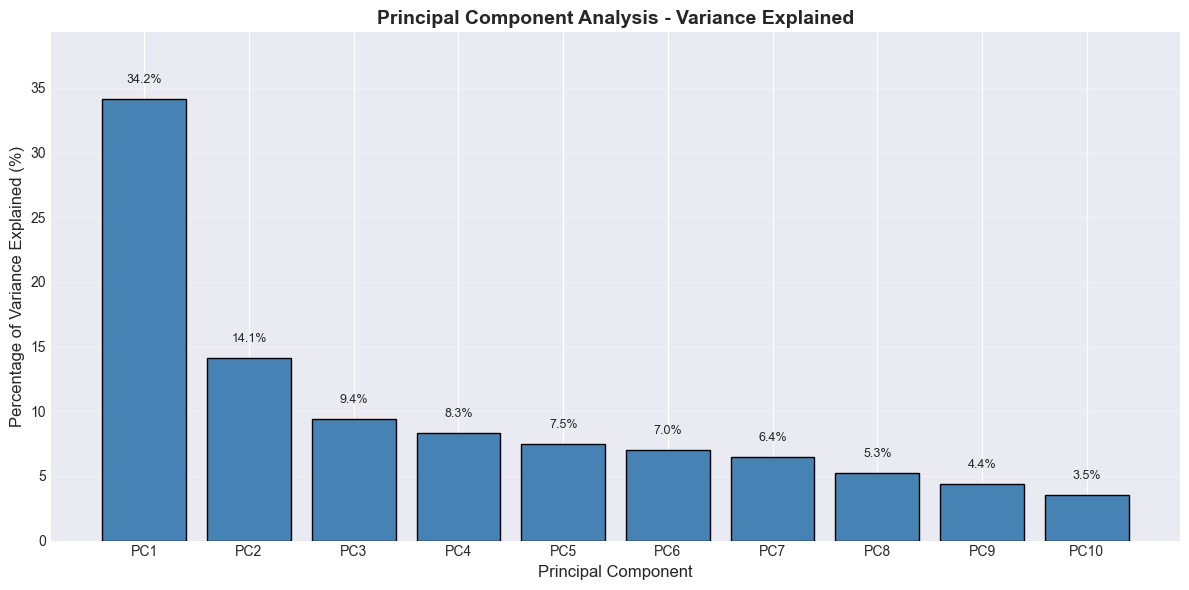

In [14]:
# Variance explained bar plot
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(variance_ratio))
ax.bar(x_pos, variance_ratio, color='steelblue', edgecolor='black')
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Percentage of Variance Explained (%)', fontsize=12)
ax.set_title('Principal Component Analysis - Variance Explained', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'PC{i+1}' for i in range(len(variance_ratio))])
ax.set_ylim(0, max(variance_ratio) * 1.15)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(variance_ratio):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Scree Plot - Eigenvalues

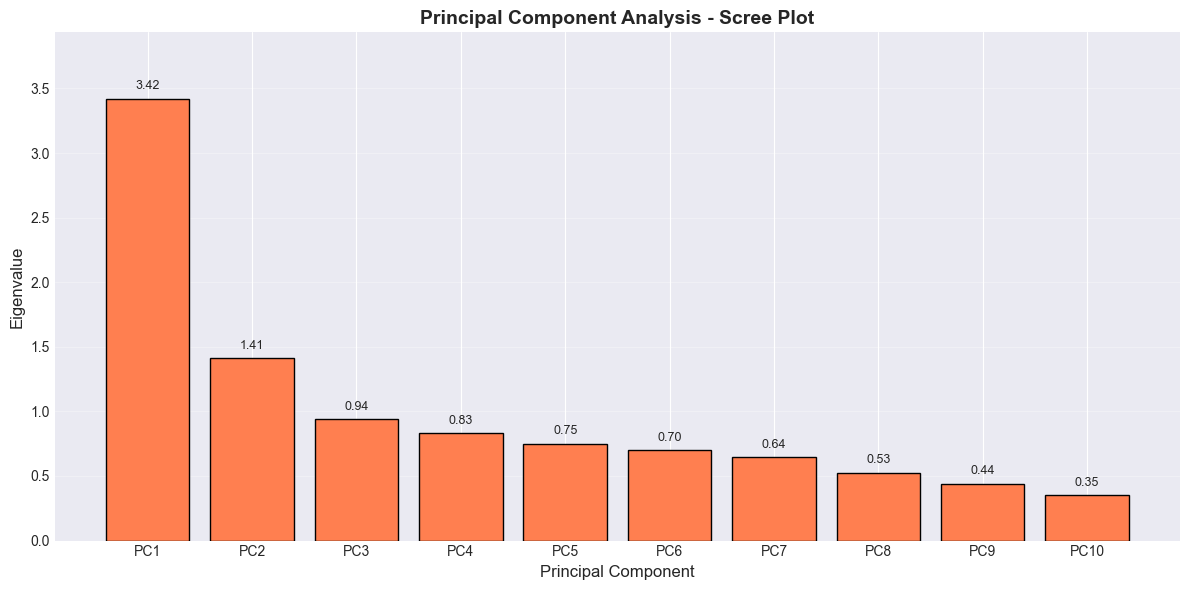

In [15]:
# Scree plot - Eigenvalues
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(pca_var))
ax.bar(x_pos, pca_var, color='coral', edgecolor='black')
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
ax.set_title('Principal Component Analysis - Scree Plot', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'PC{i+1}' for i in range(len(pca_var))])
ax.set_ylim(0, max(pca_var) * 1.15)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(pca_var):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Cumulative Variance Explained

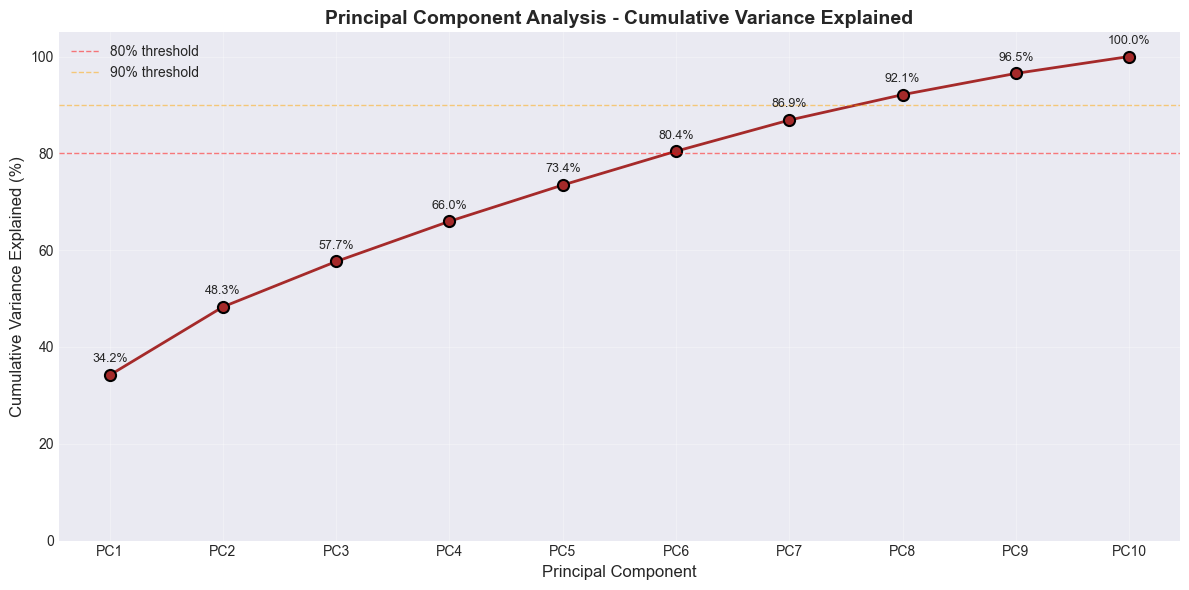

In [16]:
# Cumulative variance explained
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(cumulative_variance))
ax.plot(x_pos, cumulative_variance, marker='o', color='brown', linewidth=2, 
        markersize=8, markerfacecolor='brown', markeredgecolor='black', markeredgewidth=1.5)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
ax.set_title('Principal Component Analysis - Cumulative Variance Explained', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'PC{i+1}' for i in range(len(cumulative_variance))])
ax.set_ylim(0, 105)
ax.grid(True, alpha=0.3)

# Add horizontal line at 80% and 90%
ax.axhline(y=80, color='red', linestyle='--', linewidth=1, alpha=0.5, label='80% threshold')
ax.axhline(y=90, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='90% threshold')
ax.legend()

# Add value labels on points
for i, v in enumerate(cumulative_variance):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Summary

The PCA analysis shows how the variance in the stock returns can be explained by a smaller number of uncorrelated factors (principal components). The first few principal components typically capture most of the variation in the data, allowing for dimensionality reduction while retaining most of the information.